In [19]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Arrow, Circle
import dlib

In [20]:
facePath = "Andre_Agassi_0010.jpg"
profilePath = "000049.jpg"
fullImg = cv2.cvtColor(cv2.imread(facePath), cv2.COLOR_BGR2RGB)
profileFullImg = cv2.cvtColor(cv2.imread(profilePath), cv2.COLOR_BGR2RGB)

In [21]:
detector = dlib.get_frontal_face_detector()
profileDetector = dlib.get_frontal_face_detector()
dets = detector(fullImg, 1)
profileDets = profileDetector(profileFullImg, 1)
print "face number is {0} & {1}".format(len(dets), len(profileDets))
detect = dets[0]
print "Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, detect.left(), detect.top(), detect.right(), detect.bottom())
profileDetect = profileDets[0]
print "& Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, profileDetect.left(), profileDetect.top(),
                                                                     profileDetect.right(), profileDetect.bottom())

face number is 1 & 1
Detection 0: Left: 25 Top: 35 Right: 114 Bottom: 125
& Detection 0: Left: 30 Top: 66 Right: 138 Bottom: 174


In [22]:
shapePredict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [23]:
shape = shapePredict(fullImg, detect)
print "Total parts of {}.".format(shape.num_parts)
profileShape = shapePredict(profileFullImg, profileDetect)
print "&Total parts of {}.".format(shape.num_parts)

Total parts of 68.
&Total parts of 68.


In [24]:
list = []
for i in range(shape.num_parts):
    list.append(shape.part(i))
profileList = []
for i in range(profileShape.num_parts):
    profileList.append(profileShape.part(i))

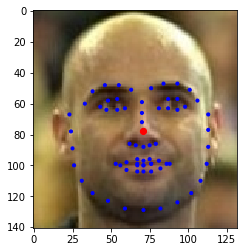

In [25]:
patch = Circle((list[30].x, list[30].y), radius=2, color='red')
fig, ax = plt.subplots(1)
ax.imshow(fullImg)
ax.add_patch(patch)
for i in range(len(list)):
    if (i == 30):
        continue
    ax.add_patch(Circle((list[i].x, list[i].y), radius=1, color='blue'))
plt.show(fig)

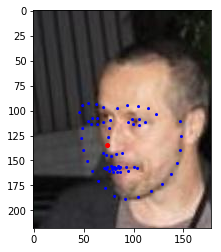

In [26]:
profilePatch = Circle((profileList[30].x, profileList[30].y), radius=2, color='red')
fig, ax = plt.subplots(1)
ax.imshow(profileFullImg)
ax.add_patch(profilePatch)
for i in range(len(profileList)):
    if (i == 30):
        continue
    ax.add_patch(Circle((profileList[i].x, profileList[i].y), radius=1, color='blue'))
plt.show(fig)

In [27]:
fig.savefig('abc.jpg')

In [28]:
profileShape.rect

rectangle(30,66,138,174)

In [29]:
shape.rect

rectangle(25,35,114,125)

In [32]:
type(shape.num_parts)

int

In [31]:
dlib.point(1,1)

point(1, 1)